# 책과 코드 읽기: 파이썬 머신러닝 완벽가이드 
 - Ch.04 분류
 - 결정트리
 - 결정트리모델의 시각화
 - 결정트리의 과적합 확인

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_rows', 500) # row 한번에 여러개 보기
pd.set_option('display.max_columns', 100) # 컬럼 한번에 여러개 보기

In [5]:
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')

## LOAD DATA SET (step.01)

In [6]:
train = pd.read_csv("C:/Users/User/Downloads/data/titanic/train.csv")
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test = pd.read_csv("C:/Users/User/Downloads/data/titanic/test.csv")
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Preprocessing

#### 1. null data

In [8]:
# train 'Age'
train["Age_fillin"] = train["Age"]
train.loc[train['Age'].isnull(), 'Age_fillin'] = train['Age'].mean()
train.loc[train['Age'].isnull(), ['Age', 'Age_fillin']].head()

,Age,Age_fillin
5,NaN,29.699118
17,NaN,29.699118
19,NaN,29.699118
26,NaN,29.699118
28,NaN,29.699118


In [9]:
# test 'Age'
test["Age_fillin"] = test["Age"]
test.loc[test['Age'].isnull(), 'Age_fillin'] = test['Age'].mean()
test.loc[test['Age'].isnull(), ['Age', 'Age_fillin']].head()

,Age,Age_fillin
10,NaN,30.27259
22,NaN,30.27259
29,NaN,30.27259
33,NaN,30.27259
36,NaN,30.27259


In [10]:
# train 'Fare'
train["Fare_fillin"] = train["Fare"]
train.loc[train['Fare'].isnull(), 'Fare_fillin'] = train['Fare'].mean()
train.loc[train['Fare'].isnull(), ['Fare', 'Fare_fillin']].head()

,Fare,Fare_fillin


In [11]:
# test 'Fare'
test["Fare_fillin"] = test["Fare"]
test.loc[test['Fare'].isnull(), 'Fare_fillin'] = test['Fare'].mean()
test.loc[test['Fare'].isnull(), ['Fare', 'Fare_fillin']].head()

,Fare,Fare_fillin
152,NaN,35.627188


#### 2. Family size

In [12]:
train["Family_size"] = train["SibSp"] + train["Parch"] + 1
print(train.shape)
train[["SibSp", "Parch", "Family_size"]].head()

(891, 15)


,SibSp,Parch,Family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [13]:
test["Family_size"] = test["SibSp"] + test["Parch"] + 1
print(test.shape)
test[["SibSp", "Parch", "Family_size"]].head()

(418, 14)


,SibSp,Parch,Family_size
0,0,0,1
1,1,0,2
2,0,0,1
3,0,0,1
4,1,1,3


In [14]:
train.loc[train['Family_size'] == 1, 'Family_size_name'] = 'single'
train.loc[(train['Family_size'] > 1) & (train['Family_size'] < 5), 'Family_size_name'] = 'small'
train.loc[train['Family_size'] > 4, 'Family_size_name'] = 'big'

train[['Family_size', 'Family_size_name']].head()

,Family_size,Family_size_name
0,2,small
1,2,small
2,1,single
3,2,small
4,1,single


In [15]:
test.loc[test['Family_size'] == 1, 'Family_size_name'] = 'single'
test.loc[(test['Family_size'] > 1) & (test['Family_size'] < 5), 'Family_size_name'] = 'small'
test.loc[test['Family_size'] > 4, 'Family_size_name'] = 'big'

test[['Family_size', 'Family_size_name']].head()

,Family_size,Family_size_name
0,1,single
1,2,small
2,1,single
3,1,single
4,3,small


In [16]:
one_got_train_Family_size_name = pd.get_dummies(train['Family_size_name'], prefix = 'Family_size_name')
one_got_train_Family_size_name.head()

,Family_size_name_big,Family_size_name_single,Family_size_name_small
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [17]:
one_got_test_Family_size_name = pd.get_dummies(test['Family_size_name'], prefix = 'Family_size_name')
one_got_test_Family_size_name.head()

,Family_size_name_big,Family_size_name_single,Family_size_name_small
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


#### 3.Name

In [18]:
train['Title'] = train['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

print(train.shape)
train[['Name', 'Title']].head()

(891, 17)


,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [19]:
test['Title'] = test['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

print(test.shape)
test[['Name', 'Title']].head()

(418, 16)


,Name,Title
0,"Kelly, Mr. James",Mr
1,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,"Myles, Mr. Thomas Francis",Mr
3,"Wirz, Mr. Albert",Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs


In [20]:
train["Master"] = train["Title"].str.contains("Master")
print(train.shape)
train[['Master', 'Name']].head()

(891, 18)


,Master,Name
0,False,"Braund, Mr. Owen Harris"
1,False,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,False,"Heikkinen, Miss. Laina"
3,False,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,False,"Allen, Mr. William Henry"


In [21]:
test["Master"] = test["Title"].str.contains("Master")
print(test.shape)
test[['Master', 'Name']].head()

(418, 17)


,Master,Name
0,False,"Kelly, Mr. James"
1,False,"Wilkes, Mrs. James (Ellen Needs)"
2,False,"Myles, Mr. Thomas Francis"
3,False,"Wirz, Mr. Albert"
4,False,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"


#### 4. small_family_baby

In [22]:
train['small_family_baby'] = (train['Family_size'] == 'small') & (train['Age_fillin'] > 10)
train[['small_family_baby', 'Family_size','Age_fillin']].head()

,small_family_baby,Family_size,Age_fillin
0,False,2,22.0
1,False,2,38.0
2,False,1,26.0
3,False,2,35.0
4,False,1,35.0


In [23]:
test['small_family_baby'] = (test['Family_size'] == 'small') & (test['Age_fillin'] > 10)
test[['small_family_baby', 'Family_size','Age_fillin']].head()

,small_family_baby,Family_size,Age_fillin
0,False,1,34.5
1,False,2,47.0
2,False,1,62.0
3,False,1,27.0
4,False,3,22.0


#### 5. Pclass

In [24]:
one_got_train_Pclass = pd.get_dummies(train['Pclass'], prefix = 'Pclass')
print(one_got_train_Pclass.shape)
one_got_train_Pclass.head()

(891, 3)


,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [25]:
one_got_test_Pclass = pd.get_dummies(test['Pclass'], prefix = 'Pclass')
print(one_got_test_Pclass.shape)
one_got_test_Pclass.head()

(418, 3)


,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


#### 6. Ticket

In [26]:
# pclass, sex에 따른 평균 생존률 구하기
# 2명 이상 소지한 티켓의 평균 생존률이 pcalss, sex에 따른 평균 생존률 대비 높은지 낮은지 확인

# find good ticket
train['good_ticket'] = False
for i in train['Pclass'].unique():
    for j in train['Sex'].unique():
        pclass_i = train['Pclass'] == i
        sex_j = train['Sex'] == j
        for k in range(len(train[(pclass_i) & (sex_j)]['Fare'])):
            fare = train[(pclass_i) & (sex_j)]['Fare'].iloc[k]
            mean_survived = train[(pclass_i) & (sex_j)]['Survived'].mean()
            fare_mean_survived = train[train['Fare'] == fare]['Survived'].mean()
            if list(train[train['Fare'] == fare]['Fare'].value_counts())[0]>1:
                if fare_mean_survived > mean_survived:
                    train.loc[(train['Fare'] == fare) & (pclass_i) & (sex_j), 'good_ticket'] = True
                    
# find bad ticket
train['bad_ticket'] = False
for i in train['Pclass'].unique():
    for j in train['Sex'].unique():
        pclass_i = train['Pclass'] == i
        sex_j = train['Sex'] == j
        for k in range(len(train[(pclass_i) & (sex_j)]['Fare'])):
            fare = train[(pclass_i) & (sex_j)]['Fare'].iloc[k]
            mean_survived = train[(pclass_i) & (sex_j)]['Survived'].mean()
            fare_mean_survived = train[train['Fare'] == fare]['Survived'].mean()
            if list(train[train['Fare'] == fare]['Fare'].value_counts())[0]>1:
                if fare_mean_survived < mean_survived:
                    # this code is shit
                    train.loc[(train['Fare'] == fare) & (pclass_i) & (sex_j), 'bad_ticket'] = True
                    
print(train.shape)
train[['Pclass', 'Sex', 'Fare', 'good_ticket', 'bad_ticket']].head()

(891, 21)


,Pclass,Sex,Fare,good_ticket,bad_ticket
0,3,male,7.2500,False,True
1,1,female,71.2833,False,False
2,3,female,7.9250,False,True
3,1,female,53.1000,False,True
4,3,male,8.0500,False,True


In [27]:
# train 의 pclass, sex 별 fare의 good_ticket와 bad_ticket가 test의 pclass, sex별 fare와 동일한지 확인

# test good ticket
test['good_ticket'] = False
for i in train['Pclass'].unique():
    for j in train['Sex'].unique():
        pclass_train_i = train['Pclass'] == i
        sex_train_j = train['Sex'] == j
        pclass_test_i = test['Pclass'] == i
        sex_test_j = test['Sex'] == j
        for k in range(len(test[(pclass_test_i) & (sex_test_j)]['Fare'])):
            fare_test = test[( pclass_test_i) & (sex_test_j)]['Fare'].iloc[k]
            fare_train = train[(pclass_train_i) & (sex_train_j)]
            if fare_test in list(fare_train[fare_train['good_ticket'] == True]['Fare']):
                test.loc[(test['Fare'] == fare_test) & (pclass_test_i) & (sex_test_j), 'good_ticket'] = True
                
# test bad ticket
test['bad_ticket'] = False
for i in train['Pclass'].unique():
    for j in train['Sex'].unique():
        pclass_train_i = train['Pclass'] == i
        sex_train_j = train['Sex'] == j
        pclass_test_i = test['Pclass'] == i
        sex_test_j = test['Sex'] == j
        for k in range(len(test[(pclass_test_i) & (sex_test_j)]['Fare'])):
            fare_test = test[( pclass_test_i) & (sex_test_j)]['Fare'].iloc[k]
            fare_train = train[(pclass_train_i) & (sex_train_j)]
            if fare_test in list(fare_train[fare_train['bad_ticket'] == True]['Fare']):
                test.loc[(test['Fare'] == fare_test) & (pclass_test_i) & (sex_test_j), 'bad_ticket'] = True



print(test.shape)
test[['Pclass', 'Sex', 'Fare', 'good_ticket', 'bad_ticket']].head()

(418, 20)


,Pclass,Sex,Fare,good_ticket,bad_ticket
0,3,male,7.8292,True,False
1,3,female,7.0000,False,False
2,2,male,9.6875,False,False
3,3,male,8.6625,False,True
4,3,female,12.2875,False,False


#### 7. Concat

In [28]:
train_concat = pd.concat([train,one_got_train_Pclass, one_got_train_Family_size_name], axis = 1)
print(train_concat.shape)
train_concat.head()

(891, 27)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fillin,Fare_fillin,Family_size,Family_size_name,Title,Master,small_family_baby,good_ticket,bad_ticket,Pclass_1,Pclass_2,Pclass_3,Family_size_name_big,Family_size_name_single,Family_size_name_small
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,7.2500,2,small,Mr,False,False,False,True,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,71.2833,2,small,Mrs,False,False,False,False,1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,7.9250,1,single,Miss,False,False,False,True,0,0,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,53.1000,2,small,Mrs,False,False,False,True,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,8.0500,1,single,Mr,False,False,False,True,0,0,1,0,1,0


In [29]:
test_concat = pd.concat([test,one_got_test_Pclass, one_got_test_Family_size_name], axis = 1)
print(test_concat.shape)
test_concat.head()

(418, 26)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fillin,Fare_fillin,Family_size,Family_size_name,Title,Master,small_family_baby,good_ticket,bad_ticket,Pclass_1,Pclass_2,Pclass_3,Family_size_name_big,Family_size_name_single,Family_size_name_small
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,7.8292,1,single,Mr,False,False,True,False,0,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,7.0000,2,small,Mrs,False,False,False,False,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,9.6875,1,single,Mr,False,False,False,False,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,8.6625,1,single,Mr,False,False,False,True,0,0,1,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,12.2875,3,small,Mrs,False,False,False,False,0,0,1,0,0,1


## Feature engineering

In [30]:
train_concat.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_fillin',
       'Fare_fillin', 'Family_size', 'Family_size_name', 'Title', 'Master',
       'small_family_baby', 'good_ticket', 'bad_ticket', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Family_size_name_big',
       'Family_size_name_single', 'Family_size_name_small'],
      dtype='object')

In [31]:
feature_names = ["Sex",  
                 'small_family_baby', 
                 'Family_size_name_big',
                 'Family_size_name_single', 
                 'Family_size_name_small',
                 'Pclass_1',
                 'Pclass_2', 
                 'Pclass_3',
                 "Master",
                 "good_ticket",
                 "bad_ticket"]

feature_names

['Sex',
 'small_family_baby',
 'Family_size_name_big',
 'Family_size_name_single',
 'Family_size_name_small',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Master',
 'good_ticket',
 'bad_ticket']

In [32]:
df = train_concat.copy()
df['target'] = df['Survived']
print(df.shape)

(891, 28)


In [33]:
label_name = "target"
label_name

'target'

In [34]:
train_feature_names = train_concat[feature_names]
test_feature_names = test_concat[feature_names]

In [35]:
dtypes_train = train_feature_names.dtypes
encoders = {}
for column in train_feature_names.columns:
    if str(dtypes_train[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(train_feature_names[column])
        encoders[column] = encoder
        
df_train = train_feature_names.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_train[column] = encoder.transform(train_feature_names[column])

print(df_train.shape)
df_train.head()

(891, 11)


,Sex,small_family_baby,Family_size_name_big,Family_size_name_single,Family_size_name_small,Pclass_1,Pclass_2,Pclass_3,Master,good_ticket,bad_ticket
0,1,False,0,0,1,0,0,1,False,False,True
1,0,False,0,0,1,1,0,0,False,False,False
2,0,False,0,1,0,0,0,1,False,False,True
3,0,False,0,0,1,1,0,0,False,False,True
4,1,False,0,1,0,0,0,1,False,False,True


In [36]:
dtypes_test = test_feature_names.dtypes
encoders = {}
for column in test_feature_names.columns:
    if str(dtypes_test[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(test_feature_names[column])
        encoders[column] = encoder
        
df_test = test_feature_names.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_test[column] = encoder.transform(test_feature_names[column])

print(df_test.shape)
df_test.head()

(418, 11)


,Sex,small_family_baby,Family_size_name_big,Family_size_name_single,Family_size_name_small,Pclass_1,Pclass_2,Pclass_3,Master,good_ticket,bad_ticket
0,1,False,0,1,0,0,0,1,False,True,False
1,0,False,0,0,1,0,0,1,False,False,False
2,1,False,0,1,0,0,1,0,False,False,False
3,1,False,0,1,0,0,0,1,False,False,True
4,0,False,0,0,1,0,0,1,False,False,False


In [37]:
X_train = df_train.copy()
print(X_train.shape)
X_train.head()

(891, 11)


,Sex,small_family_baby,Family_size_name_big,Family_size_name_single,Family_size_name_small,Pclass_1,Pclass_2,Pclass_3,Master,good_ticket,bad_ticket
0,1,False,0,0,1,0,0,1,False,False,True
1,0,False,0,0,1,1,0,0,False,False,False
2,0,False,0,1,0,0,0,1,False,False,True
3,0,False,0,0,1,1,0,0,False,False,True
4,1,False,0,1,0,0,0,1,False,False,True


In [38]:
X_test = df_test.copy()
print(X_test.shape)
X_test.head()

(418, 11)


,Sex,small_family_baby,Family_size_name_big,Family_size_name_single,Family_size_name_small,Pclass_1,Pclass_2,Pclass_3,Master,good_ticket,bad_ticket
0,1,False,0,1,0,0,0,1,False,True,False
1,0,False,0,0,1,0,0,1,False,False,False
2,1,False,0,1,0,0,1,0,False,False,False
3,1,False,0,1,0,0,0,1,False,False,True
4,0,False,0,0,1,0,0,1,False,False,False


In [39]:
y_train = df[label_name]
print(y_train.shape)
y_train.head()

(891,)


0    0
1    1
2    1
3    1
4    0
Name: target, dtype: int64

## Model

## Model - GBM

In [44]:
# train, test data set
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(df_train,
                                                    df.target,
                                                    test_size = 0.3,
                                                    random_state = 31)

# sote oversampling
smote = SMOTE(random_state = 31)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

gbm_clf_model = GradientBoostingClassifier(random_state = 0)
gbm_clf_model.fit(X_train, y_train)
gbm_clf_model_pred = gbm_clf_model.predict(X_test)

confusion = confusion_matrix(y_test, gbm_clf_model_pred)
accuracy = accuracy_score(y_test, gbm_clf_model_pred)
precision = precision_score(y_test, gbm_clf_model_pred)
recall = recall_score(y_test, gbm_clf_model_pred)
f1 = f1_score(y_test, gbm_clf_model_pred, average='weighted')
print('confusion matrix:', confusion, sep = '\n' )
#print('accuracy_score: {0:.4f}, precision_score: {1:.4f}, recall: {2:.4f}'.format(accuracy, precision, recall))
print('accuracy_score: {0:.5f}, precision_score: {1:.5f}, recall: {2:.5f}, f1_score: {3:.5f}'.format(accuracy, precision, recall,f1)) 

confusion matrix:
[[135  24]
 [ 30  79]]
accuracy_score: 0.79851, precision_score: 0.76699, recall: 0.72477, f1_score: 0.79752


## Model - XGBoost

In [46]:
# pip install xgboost
from xgboost import XGBClassifier

xgb_clf_model = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
evals = [(X_test, y_test)]
xgb_clf_model.fit(X_train, 
                  y_train,
                  early_stopping_rounds = 100,
                  eval_metric = "logloss",
                  eval_set = evals,
                  verbose = True
                 )
xgb_clf_model_pred = xgb_clf_model.predict(X_test)
xgb_clf_model_pred_proba = xgb_clf_model.predict_proba(X_test)[:,1]

confusion = confusion_matrix(y_test, xgb_clf_model_pred)
accuracy = accuracy_score(y_test, xgb_clf_model_pred)
precision = precision_score(y_test, xgb_clf_model_pred)
recall = recall_score(y_test, xgb_clf_model_pred)
f1 = f1_score(y_test, xgb_clf_model_pred, average='weighted')
print('confusion matrix:', confusion, sep = '\n' )
#print('accuracy_score: {0:.4f}, precision_score: {1:.4f}, recall: {2:.4f}'.format(accuracy, precision, recall))
print('accuracy_score: {0:.5f}, precision_score: {1:.5f}, recall: {2:.5f}, f1_score: {3:.5f}'.format(accuracy, precision, recall,f1)) 

[0]	validation_0-logloss:0.64842
[1]	validation_0-logloss:0.61200
[2]	validation_0-logloss:0.58202
[3]	validation_0-logloss:0.55680
[4]	validation_0-logloss:0.53660
[5]	validation_0-logloss:0.51931
[6]	validation_0-logloss:0.50533
[7]	validation_0-logloss:0.49183
[8]	validation_0-logloss:0.48015
[9]	validation_0-logloss:0.47124
[10]	validation_0-logloss:0.46383
[11]	validation_0-logloss:0.45731
[12]	validation_0-logloss:0.45201
[13]	validation_0-logloss:0.44650
[14]	validation_0-logloss:0.44227
[15]	validation_0-logloss:0.43912
[16]	validation_0-logloss:0.43475
[17]	validation_0-logloss:0.43222
[18]	validation_0-logloss:0.43049
[19]	validation_0-logloss:0.42872
[20]	validation_0-logloss:0.42672
[21]	validation_0-logloss:0.42593
[22]	validation_0-logloss:0.42455
[23]	validation_0-logloss:0.42420
[24]	validation_0-logloss:0.42150
[25]	validation_0-logloss:0.42115
[26]	validation_0-logloss:0.41920
[27]	validation_0-logloss:0.41881
[28]	validation_0-logloss:0.41866
[29]	validation_0-loglos

## Model - LightGBM

In [52]:
#pip insatall lightgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

lgb_clf_model = LGBMClassifier(random_state = 0, n_estimators = 400, learning_rate = 0.1)
lgb_clf_model.fit(X_train, y_train)
lgb_clf_model_pred = lgb_clf_model.predict(X_test)

confusion = confusion_matrix(y_test, lgb_clf_model_pred)
accuracy = accuracy_score(y_test, lgb_clf_model_pred)
precision = precision_score(y_test, lgb_clf_model_pred)
recall = recall_score(y_test, lgb_clf_model_pred)
f1 = f1_score(y_test, lgb_clf_model_pred, average='weighted')
print('confusion matrix:', confusion, sep = '\n' )
#print('accuracy_score: {0:.4f}, precision_score: {1:.4f}, recall: {2:.4f}'.format(accuracy, precision, recall))
print('accuracy_score: {0:.5f}, precision_score: {1:.5f}, recall: {2:.5f}, f1_score: {3:.5f}'.format(accuracy, precision, recall,f1)) 

confusion matrix:
[[135  24]
 [ 28  81]]
accuracy_score: 0.80597, precision_score: 0.77143, recall: 0.74312, f1_score: 0.80536


## Model - DecisionTreeClassifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
model = DecisionTreeClassifier(random_state=37)

# model = RandomForestClassifier(n_estimators=1000,
#                                max_depth=11,
#                                max_features=0.406603,
#                                min_samples_split = 16,
#                                min_samples_leaf = 4,
#                                n_jobs=-1,
#                                random_state=37)

In [68]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=37)

In [69]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions[0:10]

(418,)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [81]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

## 결정트리 모델의 시각화

In [82]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, out_file = 'C:/Users/User/Downloads/data/titanic/tree.dot', class_names = label_name, \
               feature_names = feature_names, impurity = True, filled = True)

with open('C:/Users/User/Downloads/data/titanic/tree.dot') as f:
    dot_graph = f.read()

#graphviz.Source(dot_graph)

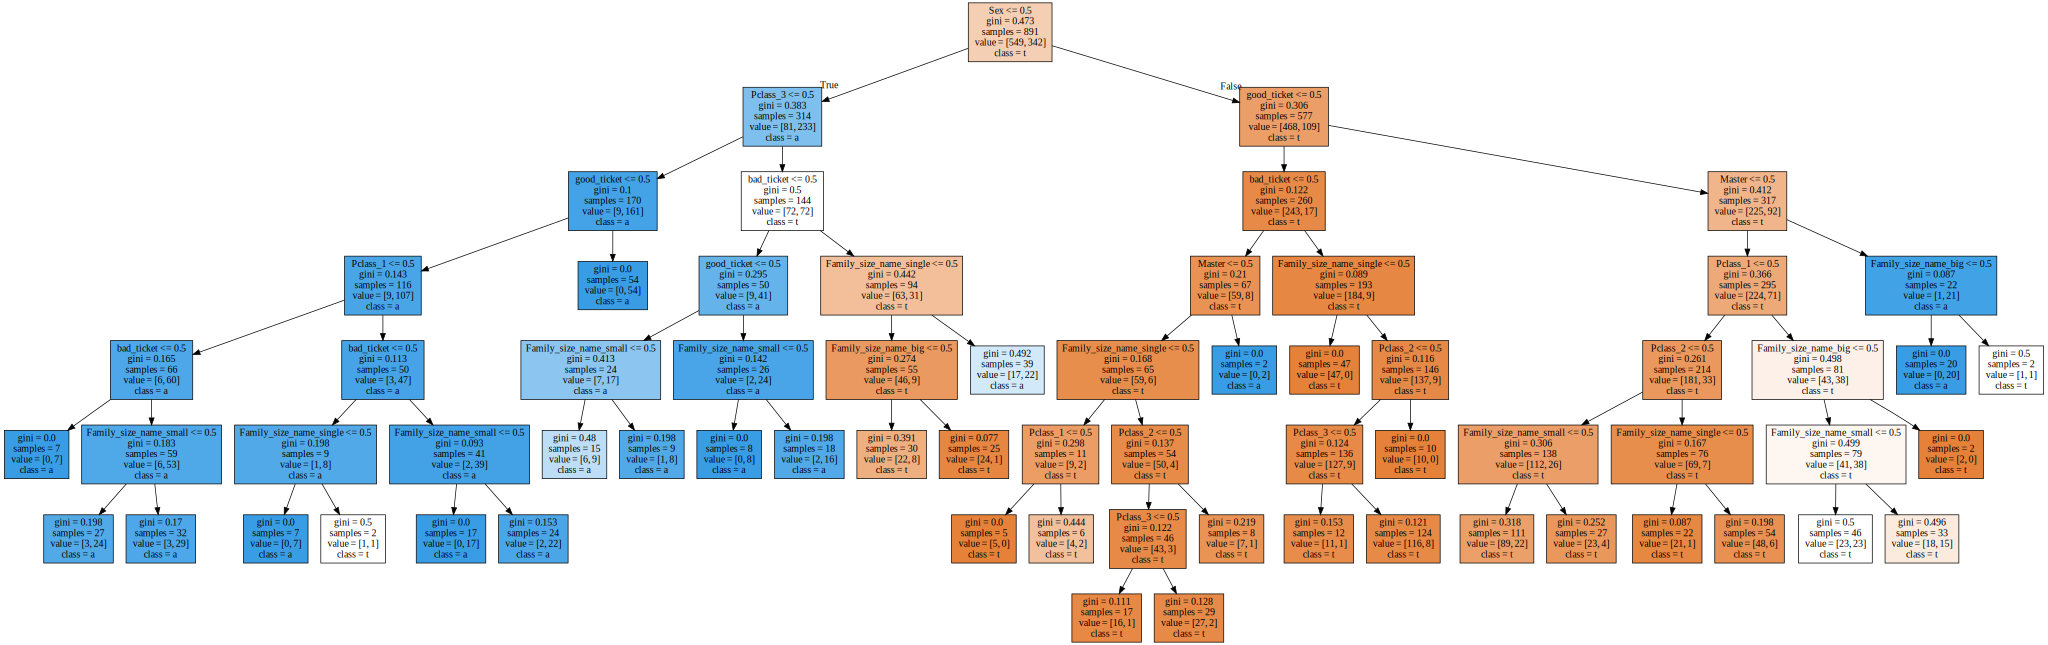

In [83]:
graphviz.Source(dot_graph)

Feature importance:
[0.521 0.    0.013 0.036 0.006 0.052 0.004 0.131 0.101 0.067 0.069]
Sex:0.521063
small_family_baby:0.000000
Family_size_name_big:0.013455
Family_size_name_single:0.036492
Family_size_name_small:0.005908
Pclass_1:0.051576
Pclass_2:0.004352
Pclass_3:0.130544
Master:0.100773
good_ticket:0.067156
bad_ticket:0.068680


<AxesSubplot:>

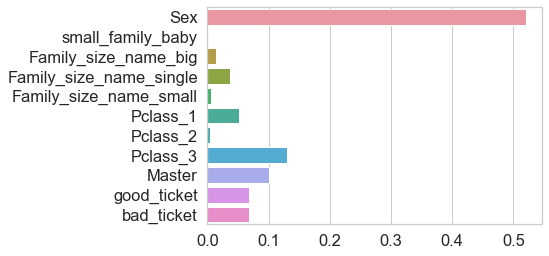

In [90]:
# feature importance 추출
print("Feature importance:\n{0}".format(np.round(model.feature_importances_, 3)))

# frature 별 importance 매핑
for name, value in zip(df[feature_names], model.feature_importances_):
    print('{0}:{1:3f}'.format(name, value))
    
# feature importance를 columns 별로 시각화
sns.barplot(x = model.feature_importances_, y = feature_names)

In [154]:
submission = pd.read_csv("C:/Users/User/Downloads/data/titanic/gender_submission.csv", index_col="PassengerId")
print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [155]:
submission["Survived"] = predictions

print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [156]:
submission.to_csv("C:/Users/User/Downloads/data/titanic/20210509_rf_submission.csv")

In [141]:
# 모듈 import
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

# 기타 라이브러리
import random
import gc
import os


# 0. 쓰고싶은 모델을 Import 한다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 1. 모델들과 결과들의 Dictionary를 만들어준다.
models_list = {'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'svm':svm.SVC(),
              'SGDClassifier':SGDClassifier(),
              'LogisticRegression':LogisticRegression()}


# 2. 클래스로 만들어 보기

class AutoML:
    
    def __init__(self, data, target,test_size, model):
        
        # 모델 리스트
        models_list = {'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'svm':svm.SVC(),
              'SGDClassifier':SGDClassifier(),
              'LogisticRegression':LogisticRegression()}
        
        self.data = data
        self.target = target
        self.test_size = test_size
        self.model = models_list[model]
        self.results = dict()
        
        # Feature, target 나누기
        X = self.data
        Y = self.target
        
        # train, test 데이터 나누기
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X,
                                                           Y,
                                                           test_size = self.test_size,
                                                           random_state = 31)
    
    def fit(self):
        self.fit = self.model.fit(self.X_train, self.y_train)
        
    def predict(self):
        self.predict = self.model.predict(self.X_test)
        
    def show(self):
        confusion = confusion_matrix(self.y_test, self.predict)
        accuracy = accuracy_score(self.y_test, self.predict)
        precision = precision_score(self.y_test, self.predict)
        recall = recall_score(self.y_test, self.predict)
        f1 = f1_score(self.y_test, self.predict, average='weighted')
        print('confusion matrix:', confusion, sep = '\n' )
        #print('accuracy_score: {0:.4f}, precision_score: {1:.4f}, recall: {2:.4f}'.format(accuracy, precision, recall))
        print('accuracy_score: {0:.5f}, precision_score: {1:.5f}, recall: {2:.5f}, f1_score: {3:.5f}'.format(accuracy, precision, recall,f1)) 
        
    def predict_proba_print(self):
        pred_proba = self.model.predict_proba(self.X_test)
        pred = self.model.predict(self.X_test)
        
        print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
        print('pred_proba array에서 3개만 샘플 추출 \n:', pred_proba[:3])
    
    def precision_recall_curve_plot(self):
        precisions, recalls, thresholds = precision_recall_curve(self.y_test,self.model.predict_proba(self.X_test)[:,1])
        
        plt.figure(figsize = (8,6))
        threshold_boundary = thresholds.shape[0]
        plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
        plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
        
        # threshold 값 x축의 Scale을 0.1 단위로 변경
        start, end = plt.xlim()
        plt.xticks(np.round(np.arange(start, end, 0.1), 2))
        
        plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
        plt.legend(); plt.grid()
        
        threshold_boundary = thresholds.shape[0]
        plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
        plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')


    def kfold(self, nfold):
        self.nfold = nfold
        folds = KFold(n_splits = nfold)
        splits = folds.split(self.X_train, self.y_train)
        columns = self.X_train.columns
        y_preds = np.zeros(self.X_test.shape[0])
        y_oof = np.zeros(self.X_train.shape[0])
        score = 0
        
        
        for fold_n, (trn_idx, val_idx)in enumerate(splits):
            X_trn, X_val = self.X_train[columns].iloc[trn_idx], self.X_train[columns].iloc[val_idx]
            y_trn, y_val = self.y_train.iloc[trn_idx], self.y_train.iloc[val_idx]
            
            self.model.fit(self.X_train, self.y_train)
            
            y_pred_val = self.model.predict(X_val)
            y_pred_val = [int(v >= 0.5) for v in y_pred_val]
            y_oof[val_idx] = y_pred_val
            
            print(f"Fold {fold_n + 1} | F1 Score: {f1_score(y_val, y_pred_val, average='weighted')}")
    
            score += f1_score(y_val, y_pred_val, average='weighted') / self.nfold
            y_preds += self.model.predict(self.X_test) / self.nfold
    
            del X_trn, X_val, y_trn, y_val
            gc.collect()
            
        print(f"\nMean F1 score = {score}")
    
    def submit(self, path, save_path):
        self.path = path
        self.save_path = save_path
        submission = pd.read_csv(self.path, index_col="PassengerId")
        submission["Survived"] = self.predict
        submission.to_csv(self.save_path)
    
        
    def Coarse_Finer_Search(self, n_estimators, num_epoch):
        self.n_estimators = n_estimators
        self.num_epoch = num_epoch
        self.coarse_hyperparameters_list = []
        self.finer_hyperparameters_list = []
        print("Start Coarse Finer Search!")

        for epoch in range(self.num_epoch):
            max_depth = np.random.randint(low=2, high=100)
            max_features = np.random.uniform(low=0.1, high=1.0)
            min_samples_split = np.random.randint(low=2, high=50)
            min_samples_leaf = np.random.randint(low=1, high=50)
            

            model = RandomForestClassifier(n_estimators=self.n_estimators,
                                           max_depth=max_depth,
                                           max_features=max_features,
                                           min_samples_split = min_samples_split,
                                           min_samples_leaf = min_samples_leaf,
                                           n_jobs=-1,
                                           random_state=37)
            
            score = cross_val_score(model, 
                                    self.data, self.target, 
                                    cv=20,
                                    scoring='f1_macro').mean()
    
            # hyperparameter 탐색 결과를 딕셔너리화 합니다.
            hyperparameters = {'epoch': epoch,
                               'score': score,
                               'n_estimators': n_estimators,
                               'max_depth': max_depth,
                               'max_features': max_features,
                               'min_samples_split': min_samples_split,
                               'min_samples_leaf': min_samples_leaf
                              }

            # hyperparameter 탐색 결과를 리스트에 저장합니다.
            self.coarse_hyperparameters_list.append(hyperparameters)

            # hyperparameter 탐색 결과를 출력합니다.
            print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, min_samples_split = {min_samples_split:2},min_samples_leaf = {min_samples_leaf:2},Score = {score:.5f}")

        # coarse_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
        df_coarse_hyperparameters_list = pd.DataFrame.from_dict(self.coarse_hyperparameters_list)

        # 변환한 coarse_hyperparameters_list를 score가 높은 순으로 정렬합니다.
        df_coarse_hyperparameters_list = df_coarse_hyperparameters_list.sort_values(by="score", ascending = False)

        # coarse_hyperparameters_list 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
        print(df_coarse_hyperparameters_list.shape)
        df_coarse_hyperparameters_list = pd.DataFrame(df_coarse_hyperparameters_list)
        best_df_coarse_hyperparameters_list = df_coarse_hyperparameters_list.head(10)
        
        print("End Coarse_Finer_Search!")
        for i in range(2):
            print('---' * 10)
        
        print('Best Coarse_Finer_Search hyperparameters list')
        print(best_df_coarse_hyperparameters_list)
        
        for i in range(2):
            print('---' * 10)
                  
        print('Start Finer Search!')
    
        for epoch in range(self.num_epoch):
            max_depth = np.random.randint(low= best_df_coarse_hyperparameters_list['max_depth'].min(), 
                                          high=best_df_coarse_hyperparameters_list['max_depth'].max())
            max_features = np.random.uniform(low=best_df_coarse_hyperparameters_list['max_features'].min(), 
                                             high=best_df_coarse_hyperparameters_list['max_features'].max())
            min_samples_split = np.random.randint(low=best_df_coarse_hyperparameters_list['min_samples_split'].min(),
                                                  high=best_df_coarse_hyperparameters_list['min_samples_split'].max())
            min_samples_leaf = np.random.randint(low=best_df_coarse_hyperparameters_list['min_samples_leaf'].min(), 
                                                 high=best_df_coarse_hyperparameters_list['min_samples_leaf'].max())
            

            model = RandomForestClassifier(n_estimators=self.n_estimators,
                                           max_depth=max_depth,
                                           max_features=max_features,
                                           min_samples_split = min_samples_split,
                                           min_samples_leaf = min_samples_leaf,
                                           n_jobs=-1,
                                           random_state=37)
            
            score = cross_val_score(model, 
                                    self.data, self.target, 
                                    cv=20,
                                    scoring='f1_macro').mean()
    
            # hyperparameter 탐색 결과를 딕셔너리화 합니다.
            hyperparameters = {'epoch': epoch,
                               'score': score,
                               'n_estimators': n_estimators,
                               'max_depth': max_depth,
                               'max_features': max_features,
                               'min_samples_split': min_samples_split,
                               'min_samples_leaf': min_samples_leaf
                              }

            # hyperparameter 탐색 결과를 리스트에 저장합니다.
            self.finer_hyperparameters_list.append(hyperparameters)

            # hyperparameter 탐색 결과를 출력합니다.
            print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, min_samples_split = {min_samples_split:2},min_samples_leaf = {min_samples_leaf:2},Score = {score:.5f}")
        
        for i in range(2):
            print('---' * 10)
        # coarse_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
        df_finer_hyperparameters_list = pd.DataFrame.from_dict(self.finer_hyperparameters_list)

        # 변환한 coarse_hyperparameters_list를 score가 높은 순으로 정렬합니다.
        df_finer_hyperparameters_list = df_finer_hyperparameters_list.sort_values(by="score", ascending = False)
        print('Best Coarse Finer Search hyperparameter')
        print(df_finer_hyperparameters_list.head(1))

In [142]:
test = AutoML(df_train, df.target, 0.3, 'RandomForestClassifier')

In [143]:
test.fit()
test.predict()
test.show()

confusion matrix:
[[135  24]
 [ 28  81]]
accuracy_score: 0.80597, precision_score: 0.77143, recall: 0.74312, f1_score: 0.80536


In [144]:
test.predict_proba_print()

pred_proba()결과 Shape : (268, 2)
pred_proba array에서 3개만 샘플 추출 
: [[0.94914023 0.05085977]
 [0.20143254 0.79856746]
 [0.05792868 0.94207132]]


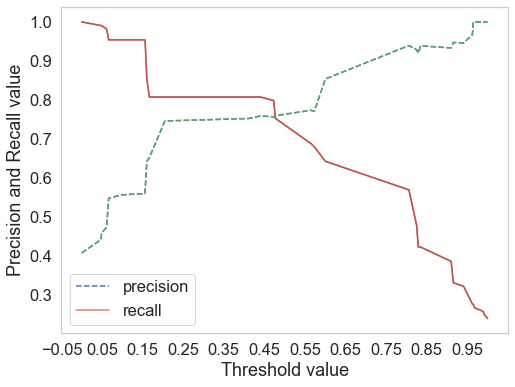

In [78]:
test.precision_recall_curve_plot()

In [79]:
test_2 = AutoML(df_train, df.target, 0.3, 'LogisticRegression')

In [80]:
test_2.fit()
test_2.predict()
test_2.show()

confusion matrix:
[[127  32]
 [ 17  92]]
accuracy_score: 0.81716, precision_score: 0.74194, recall: 0.84404, f1_score: 0.81852


In [145]:
test.kfold(5)

Fold 1 | F1 Score: 0.8728968395945139
Fold 2 | F1 Score: 0.8549245283018868
Fold 3 | F1 Score: 0.9180555555555556
Fold 4 | F1 Score: 0.8420297784659083
Fold 5 | F1 Score: 0.8376536098310292

Mean F1 score = 0.8651120623497788


In [82]:
test_2.kfold(5)

Fold 1 | F1 Score: 0.8294814814814815
Fold 2 | F1 Score: 0.8324526268522677
Fold 3 | F1 Score: 0.8875939849624062
Fold 4 | F1 Score: 0.8479610304677605
Fold 5 | F1 Score: 0.8107670730391627

Mean F1 score = 0.8416512393606157


In [146]:
test.Coarse_Finer_Search(1000,100)

Start Coarse Finer Search!
 0 n_estimators = 1000, max_depth = 83, max_features = 0.694741, min_samples_split = 49,min_samples_leaf = 28,Score = 0.79283
 1 n_estimators = 1000, max_depth = 65, max_features = 0.636044, min_samples_split = 44,min_samples_leaf =  3,Score = 0.82807
 2 n_estimators = 1000, max_depth = 49, max_features = 0.852197, min_samples_split =  7,min_samples_leaf = 40,Score = 0.78741
 3 n_estimators = 1000, max_depth =  3, max_features = 0.327569, min_samples_split = 17,min_samples_leaf =  8,Score = 0.79214
 4 n_estimators = 1000, max_depth = 40, max_features = 0.981158, min_samples_split = 34,min_samples_leaf = 11,Score = 0.82534
 5 n_estimators = 1000, max_depth = 11, max_features = 0.268333, min_samples_split = 16,min_samples_leaf =  1,Score = 0.82343
 6 n_estimators = 1000, max_depth = 18, max_features = 0.514809, min_samples_split =  4,min_samples_leaf = 11,Score = 0.83243
 7 n_estimators = 1000, max_depth = 19, max_features = 0.762361, min_samples_split = 13,min

65 n_estimators = 1000, max_depth = 61, max_features = 0.457699, min_samples_split =  5,min_samples_leaf =  9,Score = 0.83243
66 n_estimators = 1000, max_depth = 99, max_features = 0.999639, min_samples_split = 46,min_samples_leaf = 13,Score = 0.82090
67 n_estimators = 1000, max_depth = 68, max_features = 0.826099, min_samples_split = 36,min_samples_leaf = 41,Score = 0.78733
68 n_estimators = 1000, max_depth = 76, max_features = 0.407335, min_samples_split = 28,min_samples_leaf = 18,Score = 0.79775
69 n_estimators = 1000, max_depth =  5, max_features = 0.387745, min_samples_split =  2,min_samples_leaf =  6,Score = 0.83048
70 n_estimators = 1000, max_depth = 97, max_features = 0.755521, min_samples_split = 41,min_samples_leaf = 32,Score = 0.79197
71 n_estimators = 1000, max_depth = 93, max_features = 0.845980, min_samples_split = 29,min_samples_leaf = 15,Score = 0.81281
72 n_estimators = 1000, max_depth = 79, max_features = 0.423511, min_samples_split = 25,min_samples_leaf = 42,Score = 

20 n_estimators = 1000, max_depth = 14, max_features = 0.735503, min_samples_split = 11,min_samples_leaf =  5,Score = 0.83049
21 n_estimators = 1000, max_depth = 14, max_features = 0.680860, min_samples_split = 27,min_samples_leaf =  3,Score = 0.82766
22 n_estimators = 1000, max_depth = 46, max_features = 0.512604, min_samples_split = 17,min_samples_leaf =  2,Score = 0.82995
23 n_estimators = 1000, max_depth = 39, max_features = 0.383351, min_samples_split = 38,min_samples_leaf =  3,Score = 0.83381
24 n_estimators = 1000, max_depth = 60, max_features = 0.508779, min_samples_split = 28,min_samples_leaf =  2,Score = 0.82988
25 n_estimators = 1000, max_depth = 26, max_features = 0.578401, min_samples_split =  6,min_samples_leaf =  9,Score = 0.83266
26 n_estimators = 1000, max_depth =  6, max_features = 0.747015, min_samples_split = 22,min_samples_leaf =  3,Score = 0.82903
27 n_estimators = 1000, max_depth = 33, max_features = 0.515660, min_samples_split = 10,min_samples_leaf = 10,Score = 

86 n_estimators = 1000, max_depth = 59, max_features = 0.458068, min_samples_split = 20,min_samples_leaf =  5,Score = 0.83093
87 n_estimators = 1000, max_depth = 45, max_features = 0.432047, min_samples_split =  2,min_samples_leaf =  9,Score = 0.83243
88 n_estimators = 1000, max_depth = 34, max_features = 0.419826, min_samples_split = 19,min_samples_leaf =  9,Score = 0.83243
89 n_estimators = 1000, max_depth = 41, max_features = 0.679294, min_samples_split = 18,min_samples_leaf =  4,Score = 0.82903
90 n_estimators = 1000, max_depth = 57, max_features = 0.583140, min_samples_split = 39,min_samples_leaf =  7,Score = 0.83277
91 n_estimators = 1000, max_depth = 50, max_features = 0.403186, min_samples_split = 25,min_samples_leaf = 10,Score = 0.83243
92 n_estimators = 1000, max_depth = 21, max_features = 0.669300, min_samples_split = 27,min_samples_leaf =  2,Score = 0.82320
93 n_estimators = 1000, max_depth = 19, max_features = 0.483838, min_samples_split = 12,min_samples_leaf =  2,Score = 